# Restaurant Footfall Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Corrected the typo here
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df.info()

    features = [
        "Menu_Price", "Average_Customer_Spending", "Marketing_Spend", "Promotions", "Reviews",
        "Monthly_Revenue", "Footfall_Lag_1", "Footfall_Lag_7", "Weather_Rainy", "Weather_Snowy", "Weather_Sunny",
        "Day_of_Week_Monday", "Day_of_Week_Saturday", "Day_of_Week_Sunday", "Day_of_Week_Thursday",
        "Day_of_Week_Tuesday", "Day_of_Week_Wednesday"
    ]

    X = df[features]
    y = df["Footfall_Count"]

    return X, y

In [2]:

def plot_predictions(y_test, rf_preds, gb_preds):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual Footfall", marker='o', linestyle='dashed')
    plt.plot(rf_preds, label="Predicted Footfall (Random Forest)", marker='s')
    plt.plot(gb_preds, label="Predicted Footfall (Gradient Boosting)", marker='^')
    plt.xlabel("Test Data Index")
    plt.ylabel("Number of Customers")
    plt.title("Actual vs. Predicted Footfall")
    plt.legend()
    plt.grid(True)
    plt.show()



In [3]:
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)

    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_preds = gb_model.predict(X_test)

    rf_preds = rf_preds.astype(int)
    gb_preds = gb_preds.astype(int)

    def evaluate_model(y_true, y_pred, model_name):
        print(f"\n📊 {model_name} Performance:")
        print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
        print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
        print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

    evaluate_model(y_test, rf_preds, "Random Forest")
    evaluate_model(y_test, gb_preds, "Gradient Boosting")

    results_df = pd.DataFrame({
        "Actual Footfall": y_test.values,
        "Predicted Footfall (RF)": rf_preds,
        "Predicted Footfall (GB)": gb_preds
    })
    print("\n📌 Actual vs Predicted Footfall (First 10 Entries):")
    print(results_df.head(10))

    plot_predictions(y_test, rf_preds, gb_preds)


In [4]:

def run_footfall_prediction():
    file_path = 'fixed_restaurant_data.csv'
    X, y = load_and_process_data(file_path)
    train_models(X, y)



In [5]:
import pandas as pd
df=pd.read_csv(r'final_processed_restaurant_data.csv.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Footfall_Count               5473 non-null   int64  
 1   Quantity_Sold                5473 non-null   int64  
 2   Menu_Price                   5473 non-null   float64
 3   Average_Customer_Spending    5473 non-null   float64
 4   Marketing_Spend              5473 non-null   float64
 5   Promotions                   5473 non-null   int64  
 6   Reviews                      5473 non-null   float64
 7   Monthly_Revenue              5473 non-null   float64
 8   Footfall_Lag_1               5473 non-null   float64
 9   Footfall_Lag_7               5473 non-null   float64
 10  Day_of_Week_Monday           5473 non-null   int64  
 11  Day_of_Week_Saturday         5473 non-null   int64  
 12  Day_of_Week_Sunday           5473 non-null   int64  
 13  Day_of_Week_Thursd

# REVENUE PREDICTION

In [6]:
! /srv/jupyter/python-venv/bin/python3 -m pip install statsmodels --user


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [8]:

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    start_date = pd.to_datetime("2020-01-01")  # Example start date
    df["Date"] = [start_date + timedelta(days=i) for i in range(len(df))]
    df.set_index("Date", inplace=True)
    df.sort_index(inplace=True)
    return df


In [9]:

def plot_time_series(ts, title="Time Series Data"):
    plt.figure(figsize=(12,6))
    plt.plot(ts, label=title)
    plt.title(title)
    plt.legend()
    plt.show()

def decompose_time_series(ts, period=7):
    result = seasonal_decompose(ts, model='additive', period=period)
    result.plot()
    plt.show()
    return result

def train_sarima_model(train_data):
    model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,7)).fit()
    return model



In [10]:
def evaluate_model(test, forecast):
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape = mean_absolute_percentage_error(test, forecast) * 100
    print(f"RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

def plot_actual_vs_predicted(test, forecast):
    plt.figure(figsize=(12,6))
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, forecast, label='Predicted', linestyle='dashed')
    plt.legend()
    plt.title("Actual vs Predicted Revenue")
    plt.show()



In [11]:
def forecast_future(model, ts, future_steps=30):
    future_forecast = model.predict(start=len(ts), end=len(ts) + future_steps - 1, dynamic=False)
    df_forecast = pd.DataFrame({"Date": pd.date_range(start=ts.index[-1] + timedelta(days=1), periods=future_steps), "Predicted_Revenue": future_forecast.values})
    df_forecast.to_csv("future_forecast.csv", index=False)
    print("Forecasting complete. Results saved.")
    return df_forecast



In [12]:
def evaluate_model(y_test, y_pred): # Changed argument names to y_test, y_pred
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    print(f"RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

def run_sales_forecasting0():
    file_path = r"fixed_restaurant_data (1).csv"
    df = load_and_prepare_data(file_path)
    target_col = "Monthly_Revenue"
    ts = df[target_col]

    plot_time_series(ts, title="Monthly Revenue Over Time")
    decompose_time_series(ts, period=7)

    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    sarima_model = train_sarima_model(train)
    forecast = sarima_model.predict(start=len(train), end=len(ts)-1, dynamic=False)

    evaluate_model(test, forecast) # Calling evaluate_model with test as y_test and forecast as y_pred
    plot_actual_vs_predicted(test, forecast)

    forecast_future(sarima_model, ts, future_steps=30)


In [13]:
def run_sales_forecasting():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    # Load dataset
    file_path = r"fixed_restaurant_data.csv"
    df = pd.read_csv(file_path)

    # Use a more recent start date to ensure 2025 predictions
    start_date = pd.to_datetime("2024-01-01")
    df["Date"] = [start_date + pd.Timedelta(days=i) for i in range(len(df))]

    df.set_index("Date", inplace=True)
    df.sort_index(inplace=True)

    ts = df["Monthly_Revenue"]

    # Train SARIMA model
    sarima_model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,7)).fit()

    # Get user input
    future_steps = int(input("\n📅 Enter number of days to forecast: "))

    # Predict future revenue
    future_forecast = sarima_model.predict(start=len(ts), end=len(ts) + future_steps - 1, dynamic=False)

    # Ensure predictions align with 2025
    df_forecast = pd.DataFrame({"Date": pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=future_steps),
                                "Predicted_Revenue": future_forecast.values})

    print("\n📊 Predicted Revenue for Next Days:\n", df_forecast)



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load data
def load_data(file_path):
    return pd.read_csv(file_path)

# Preprocess data
def process_data(data):
    # Drop unnecessary columns
    data = data.drop(columns=['reassignment_method', 'reassignment_reason', 'cancelled_time'], errors='ignore')

    # Fill missing numerical values with median
    num_cols = ['alloted_orders', 'delivered_orders', 'undelivered_orders', 
                'lifetime_order_count', 'reassigned_order', 'session_time']
    
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # Convert timestamps to datetime with correct format
    data["order_time"] = pd.to_datetime(data["order_time"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
    data["delivered_time"] = pd.to_datetime(data["delivered_time"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

    # Remove rows where date parsing failed
    data = data.dropna(subset=["order_time", "delivered_time"])

    # Calculate delivery time in hours
    data["delivery_time"] = (data["delivered_time"] - data["order_time"]).dt.total_seconds() / 3600

    # Remove unrealistic values (e.g., future dates)
    data = data[(data["order_time"] < pd.Timestamp.now()) & (data["delivered_time"] < pd.Timestamp.now())]

    return data

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Predict delivery time based on user input
def predict_delivery_time(model, data):
    print("\n📍 Enter Delivery Details:\n")
    first_mile = float(input("🚴 Enter First Mile Distance (km): "))
    last_mile = float(input("🏠 Enter Last Mile Distance (km): "))

    # Define features used in the model
    features = ['first_mile_distance', 'last_mile_distance', 'alloted_orders', 
                'delivered_orders', 'undelivered_orders', 'lifetime_order_count', 
                'reassigned_order', 'order_to_allot', 'allot_to_accept', 'accept_to_pickup', 'pickup_to_delivery']

    # Ensure selected features exist in the dataset
    features = [f for f in features if f in data.columns]

    # Prepare input data with user values and median values for missing ones
    input_data = pd.DataFrame([{
        'first_mile_distance': first_mile,
        'last_mile_distance': last_mile,
        **{col: data[col].median() for col in features if col not in ['first_mile_distance', 'last_mile_distance']}
    }])

    # Predict delivery time
    predicted_time = model.predict(input_data)[0]
    print(f"\n⏳ Prediction: The order will be delivered in **{predicted_time:.2f} hours.**")

# Main execution
def run_market_analysis():
    file_path = 'Rider-Info.csv'
    data = load_data(file_path)
    data = process_data(data)

    target = 'delivery_time'
    features = ['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'delivered_orders',
                'undelivered_orders', 'lifetime_order_count', 'reassigned_order',
                'order_to_allot', 'allot_to_accept', 'accept_to_pickup', 'pickup_to_delivery']

    # Ensure features exist in the dataset
    features = [f for f in features if f in data.columns]

    X = data[features]
    y = data[target]

    # Handle missing or invalid target values
    X, y = X[~y.isna()], y.dropna()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = train_model(X_train, y_train)
    mae = evaluate_model(model, X_test, y_test)

    print("\n🎯 Model Performance:")
    print(f"Mean Absolute Error: {mae:.2f} hours")

    # Get user input and predict delivery time
    predict_delivery_time(model, data)




🎯 Model Performance:
Mean Absolute Error: 0.18 hours

📍 Enter Delivery Details:



🚴 Enter First Mile Distance (km):  2
🏠 Enter Last Mile Distance (km):  2



⏳ Prediction: The order will be delivered in **0.53 hours.**


# Market Analysis

In [14]:
df = pd.read_csv(r'Rider-Info.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load data
def load_data(file_path):
    return pd.read_csv(file_path)

# Preprocess data
def process_data(data):
    # Drop unnecessary columns
    data = data.drop(columns=['reassignment_method', 'reassignment_reason', 'cancelled_time'], errors='ignore')

    # Fill missing numerical values with median
    num_cols = ['alloted_orders', 'delivered_orders', 'undelivered_orders', 
                'lifetime_order_count', 'reassigned_order', 'session_time']
    
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # Convert timestamps to datetime
    data["order_time"] = pd.to_datetime(data["order_time"], errors='coerce')
    data["delivered_time"] = pd.to_datetime(data["delivered_time"], errors='coerce')

    # Calculate delivery time in hours
    data["delivery_time"] = (data["delivered_time"] - data["order_time"]).dt.total_seconds() / 3600

    # Drop rows with missing delivery_time
    data = data.dropna(subset=["delivery_time"])

    return data

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Predict delivery time based on user input
def predict_delivery_time(model, data):
    print("\n📍 Enter Delivery Details:\n")
    first_mile = float(input("🚴 Enter First Mile Distance (km): "))
    last_mile = float(input("🏠 Enter Last Mile Distance (km): "))

    # Define features used in the model
    features = ['first_mile_distance', 'last_mile_distance', 'alloted_orders', 
                'delivered_orders', 'undelivered_orders', 'lifetime_order_count', 
                'reassigned_order', 'order_to_allot', 'allot_to_accept', 'accept_to_pickup', 'pickup_to_delivery']

    # Ensure selected features exist in the dataset
    features = [f for f in features if f in data.columns]

    # Prepare input data with user values and median values for missing ones
    input_data = pd.DataFrame([{
        'first_mile_distance': first_mile,
        'last_mile_distance': last_mile,
        **{col: data[col].median() for col in features if col not in ['first_mile_distance', 'last_mile_distance']}
    }])

    # Predict delivery time
    predicted_time = model.predict(input_data)[0]
    print(f"\n⏳ The order will be delivered in **{predicted_time:.2f} hours.**")

# Main execution
def run_market_analysis():
    file_path = 'Rider-Info.csv'
    data = load_data(file_path)
    data = process_data(data)

    target = 'delivery_time'
    features = ['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'delivered_orders',
                'undelivered_orders', 'lifetime_order_count', 'reassigned_order',
                'order_to_allot', 'allot_to_accept', 'accept_to_pickup', 'pickup_to_delivery']

    # Ensure features exist in the dataset
    features = [f for f in features if f in data.columns]

    X = data[features]
    y = data[target]

    # Handle missing or invalid target values
    X, y = X[~y.isna()], y.dropna()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = train_model(X_train, y_train)
    mae = evaluate_model(model, X_test, y_test)

    print("\n🎯 Model Performance:")
    print(f"Mean Absolute Error: {mae:.2f} hours")

    # Get user input and predict delivery time
    predict_delivery_time(model, data)

# Run the analysis



# User Interaction


📊 Welcome to AI-Powered Restaurant Analytics System!
Choose a model to run:
1️⃣ Restaurant Sales Forecasting (SARIMA)
2️⃣ Customer Footfall Prediction (Random Forest & GB)
3️⃣ Competitor & Market Analysis (Swiggy Dataset)
4️⃣ Exit



Enter your choice (1-4):  1



🔍 Running Restaurant Sales Forecasting Model...


/home/uac163cd117b2ed92315a1319fc80841/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/uac163cd117b2ed92315a1319fc80841/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



📅 Enter number of days to forecast:  10



📊 Predicted Revenue for Next Days:
         Date  Predicted_Revenue
0 2038-12-26        8322.280360
1 2038-12-27        8383.002595
2 2038-12-28        8603.484058
3 2038-12-29        7989.473617
4 2038-12-30        8138.422889
5 2038-12-31        8319.770926
6 2039-01-01        7942.231330
7 2039-01-02        8418.243938
8 2039-01-03        8281.135870
9 2039-01-04        8515.428118

📊 Welcome to AI-Powered Restaurant Analytics System!
Choose a model to run:
1️⃣ Restaurant Sales Forecasting (SARIMA)
2️⃣ Customer Footfall Prediction (Random Forest & GB)
3️⃣ Competitor & Market Analysis (Swiggy Dataset)
4️⃣ Exit



Enter your choice (1-4):  2



📈 Running Customer Footfall Prediction Model...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         5473 non-null   object 
 1   Footfall_Count               5473 non-null   int64  
 2   Quantity_Sold                5473 non-null   int64  
 3   Menu_Price                   5473 non-null   float64
 4   Average_Customer_Spending    5473 non-null   float64
 5   Marketing_Spend              5473 non-null   float64
 6   Promotions                   5473 non-null   int64  
 7   Reviews                      5473 non-null   float64
 8   Monthly_Revenue              5473 non-null   float64
 9   Footfall_Lag_1               5473 non-null   float64
 10  Footfall_Lag_7               5473 non-null   float64
 11  Day_of_Week_Monday           5473 non-null   int64  
 12  Day_of_Week_Saturday       

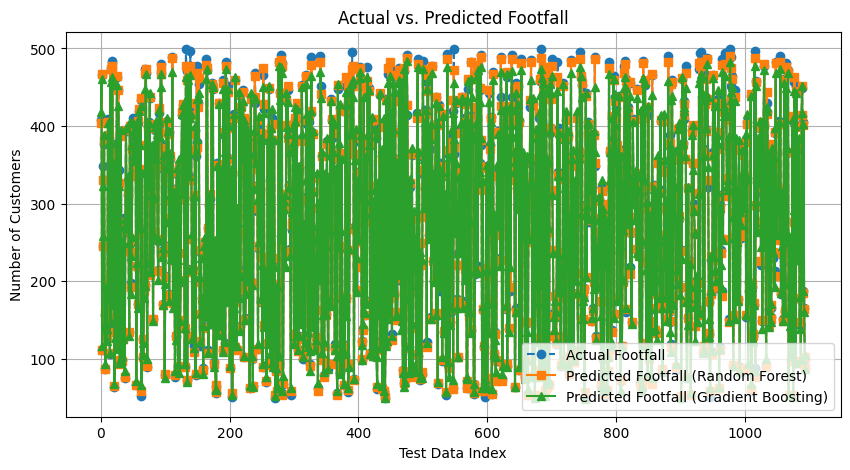


📊 Welcome to AI-Powered Restaurant Analytics System!
Choose a model to run:
1️⃣ Restaurant Sales Forecasting (SARIMA)
2️⃣ Customer Footfall Prediction (Random Forest & GB)
3️⃣ Competitor & Market Analysis (Swiggy Dataset)
4️⃣ Exit



Enter your choice (1-4):  3



📊 Running Competitor & Market Analysis Model...

🎯 Model Performance:
Mean Absolute Error: 0.18 hours

📍 Enter Delivery Details:



🚴 Enter First Mile Distance (km):  2
🏠 Enter Last Mile Distance (km):  2



⏳ The order will be delivered in **0.53 hours.**

📊 Welcome to AI-Powered Restaurant Analytics System!
Choose a model to run:
1️⃣ Restaurant Sales Forecasting (SARIMA)
2️⃣ Customer Footfall Prediction (Random Forest & GB)
3️⃣ Competitor & Market Analysis (Swiggy Dataset)
4️⃣ Exit



Enter your choice (1-4):  exit


❌ Invalid choice. Please enter a number between 1 and 4.

📊 Welcome to AI-Powered Restaurant Analytics System!
Choose a model to run:
1️⃣ Restaurant Sales Forecasting (SARIMA)
2️⃣ Customer Footfall Prediction (Random Forest & GB)
3️⃣ Competitor & Market Analysis (Swiggy Dataset)
4️⃣ Exit



Enter your choice (1-4):  4



✅ Exiting the system. Have a great day!


In [23]:
def main():
    while True:
        print("\n📊 Welcome to AI-Powered Restaurant Analytics System!")
        print("Choose a model to run:")
        print("1️⃣ Restaurant Sales Forecasting (SARIMA)")
        print("2️⃣ Customer Footfall Prediction (Random Forest & GB)")
        print("3️⃣ Competitor & Market Analysis (Swiggy Dataset)")
        print("4️⃣ Exit\n")

        choice = input("Enter your choice (1-4): ")

        if choice == "1":
            print("\n🔍 Running Restaurant Sales Forecasting Model...")
            run_sales_forecasting()

        elif choice == "2":
            print("\n📈 Running Customer Footfall Prediction Model...")
            run_footfall_prediction()

        elif choice == "3":
            print("\n📊 Running Competitor & Market Analysis Model...")
            run_market_analysis()



        elif choice == "4":
            print("\n✅ Exiting the system. Have a great day!")
            break

        else:
            print("❌ Invalid choice. Please enter a number between 1 and 4.")

# Run the main function
main()
